In [79]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [80]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [81]:
qasm_simulator = Aer.get_backend("qasm_simulator")
state_vector_simulator = Aer.get_backend("statevector_simulator")

In [82]:
def run_on_simulators(circuit):
    state_vector_job = execute(circuit, backend=state_vector_simulator)
    result = state_vector_job.result()
    state_vertor = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job= execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    return state_vertor, counts

In [83]:
circuit = QuantumCircuit(2, 2)
statevec, counts = run_on_simulators(circuit)

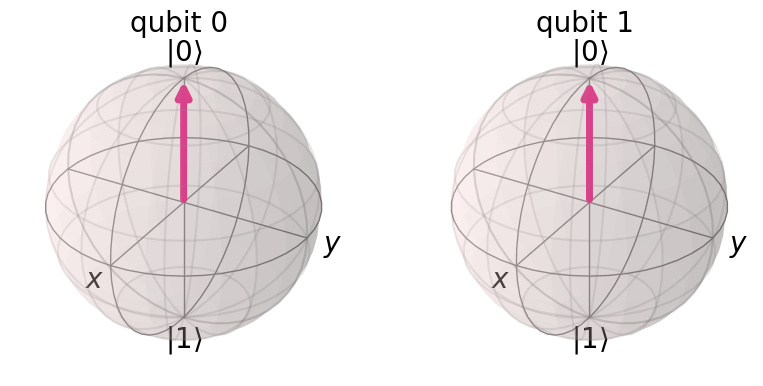

In [84]:
plot_bloch_multivector(statevec)

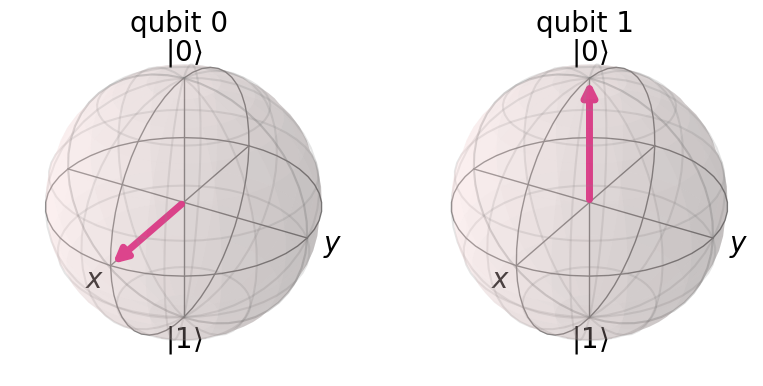

In [85]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

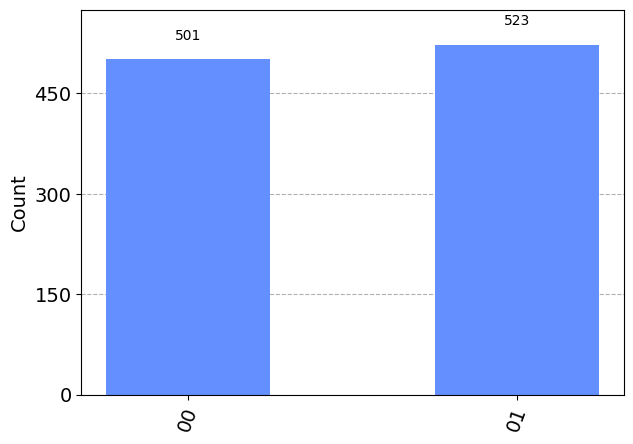

In [86]:
plot_histogram(counts)

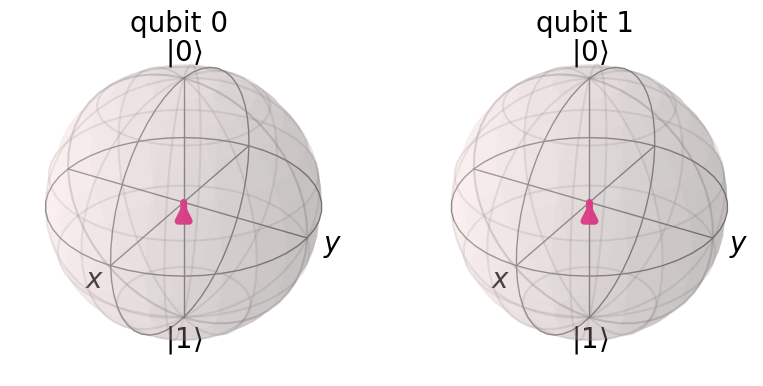

In [87]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

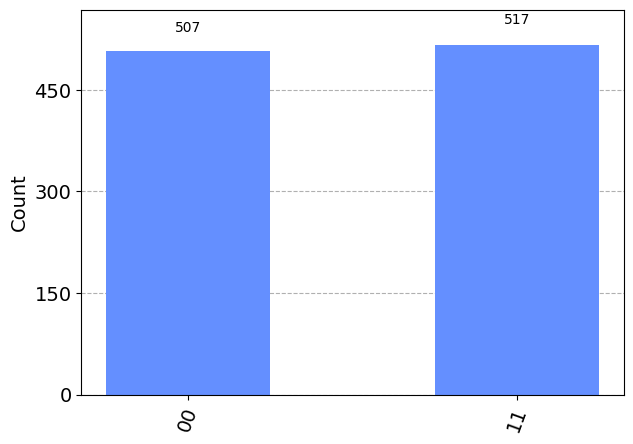

In [88]:
plot_histogram(counts)

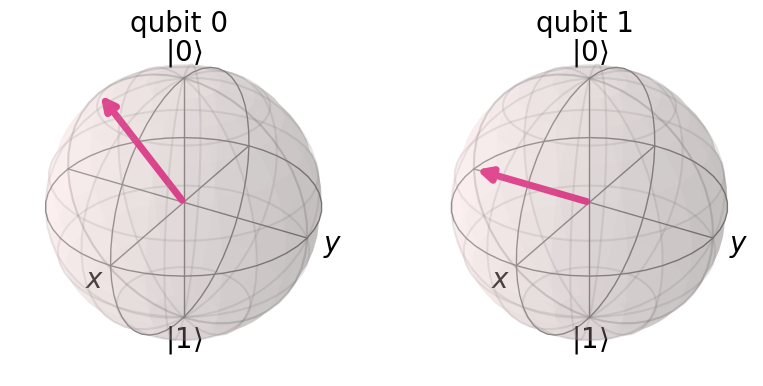

In [89]:
circuit = QuantumCircuit(2, 2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

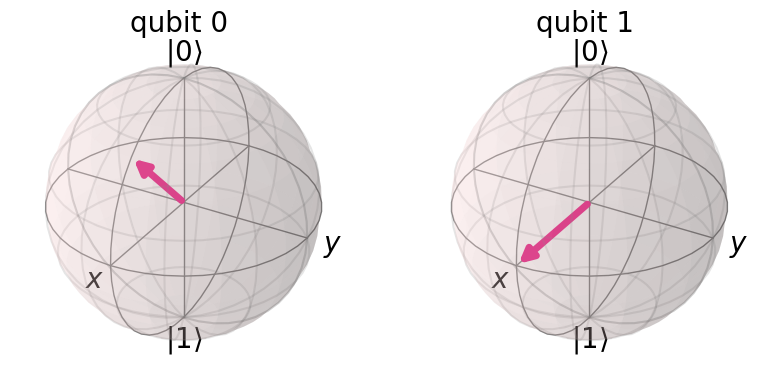

In [90]:
circuit = QuantumCircuit(2, 2)
circuit.ry(math.pi/4, 0)
circuit.ry(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

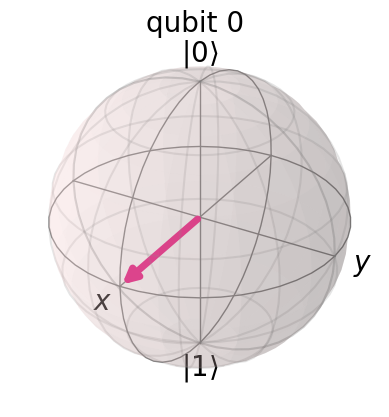

In [91]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

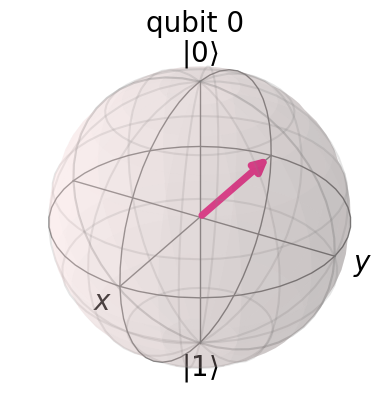

In [92]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)